<a href="https://colab.research.google.com/github/shrishtinigam/Computer_Vision_OpenCV/blob/main/Computer_Vision_Lab_13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import cv2 as cv2
from google.colab.patches import cv2_imshow # for image display
import math

## Extract any related 5 blob features

In [ ]:
"""def blob_extracter(image):
  r, c = image.shape
  blobs = np.zeros([r,c])
  blob_no = 0
  cv2_imshow(blobs)
  for i in range(1, r):
    for j in range(1, c):
      if(image[i][j] != 0):
         #print(blobs[i-1][j], blobs[i][j-1], blobs[i-1][j+1], blobs[i-1][j-1])
         if(blobs[i-1][j] != blobs[i][j-1] or blobs[i-1][j+1] != blobs[i-1][j-1]):
           print(i, j)
         if(blobs[i-1][j] != 0):
           blobs[i][j] = blobs[i-1][j]
         elif(blobs[i][j-1] != 0):
           blobs[i][j] = blobs[i][j-1]
         elif(blobs[i-1][j+1] != 0):
           blobs[i][j] = blobs[i-1][j+1]
         elif(blobs[i-1][j-1] != 0):
           blobs[i][j] = blobs[i-1][j-1]
         else:
           blob_no += 1
           blobs[i][j] = blob_no * 3
  cv2_imshow(blobs)
  return blobs, blob_no"""

'def blob_extracter(image):\n  r, c = image.shape\n  blobs = np.zeros([r,c])\n  blob_no = 0\n  cv2_imshow(blobs)\n  for i in range(1, r):\n    for j in range(1, c):\n      if(image[i][j] != 0):\n         #print(blobs[i-1][j], blobs[i][j-1], blobs[i-1][j+1], blobs[i-1][j-1])\n         if(blobs[i-1][j] != blobs[i][j-1] or blobs[i-1][j+1] != blobs[i-1][j-1]):\n           print(i, j)\n         if(blobs[i-1][j] != 0):\n           blobs[i][j] = blobs[i-1][j]\n         elif(blobs[i][j-1] != 0):\n           blobs[i][j] = blobs[i][j-1]\n         elif(blobs[i-1][j+1] != 0):\n           blobs[i][j] = blobs[i-1][j+1]\n         elif(blobs[i-1][j-1] != 0):\n           blobs[i][j] = blobs[i-1][j-1]\n         else:\n           blob_no += 1\n           blobs[i][j] = blob_no * 3\n  cv2_imshow(blobs)\n  return blobs, blob_no'

In [ ]:
image = cv2.imread("blob.png", cv2.IMREAD_GRAYSCALE)

In [ ]:
# Set up the detector with default parameters.
params = cv2.SimpleBlobDetector_Params()

(< cv2.KeyPoint 0x7f54839a6b70>, < cv2.KeyPoint 0x7f54819f4330>, < cv2.KeyPoint 0x7f54819f46c0>, < cv2.KeyPoint 0x7f5466b5fcc0>, < cv2.KeyPoint 0x7f546b00b8a0>, < cv2.KeyPoint 0x7f546587f300>, < cv2.KeyPoint 0x7f5466abac00>, < cv2.KeyPoint 0x7f5466abae40>, < cv2.KeyPoint 0x7f54645d26c0>, < cv2.KeyPoint 0x7f54645d2360>, < cv2.KeyPoint 0x7f54645b18a0>, < cv2.KeyPoint 0x7f54645b1960>, < cv2.KeyPoint 0x7f54645b1cf0>, < cv2.KeyPoint 0x7f54645b1600>, < cv2.KeyPoint 0x7f54645b1ed0>, < cv2.KeyPoint 0x7f54645b1c00>, < cv2.KeyPoint 0x7f54645b1630>, < cv2.KeyPoint 0x7f54645b1690>, < cv2.KeyPoint 0x7f54645b1c60>, < cv2.KeyPoint 0x7f54645b1d50>, < cv2.KeyPoint 0x7f54645b1c30>, < cv2.KeyPoint 0x7f54645b1d80>, < cv2.KeyPoint 0x7f54645b1450>, < cv2.KeyPoint 0x7f54645b1780>, < cv2.KeyPoint 0x7f54645b16f0>)


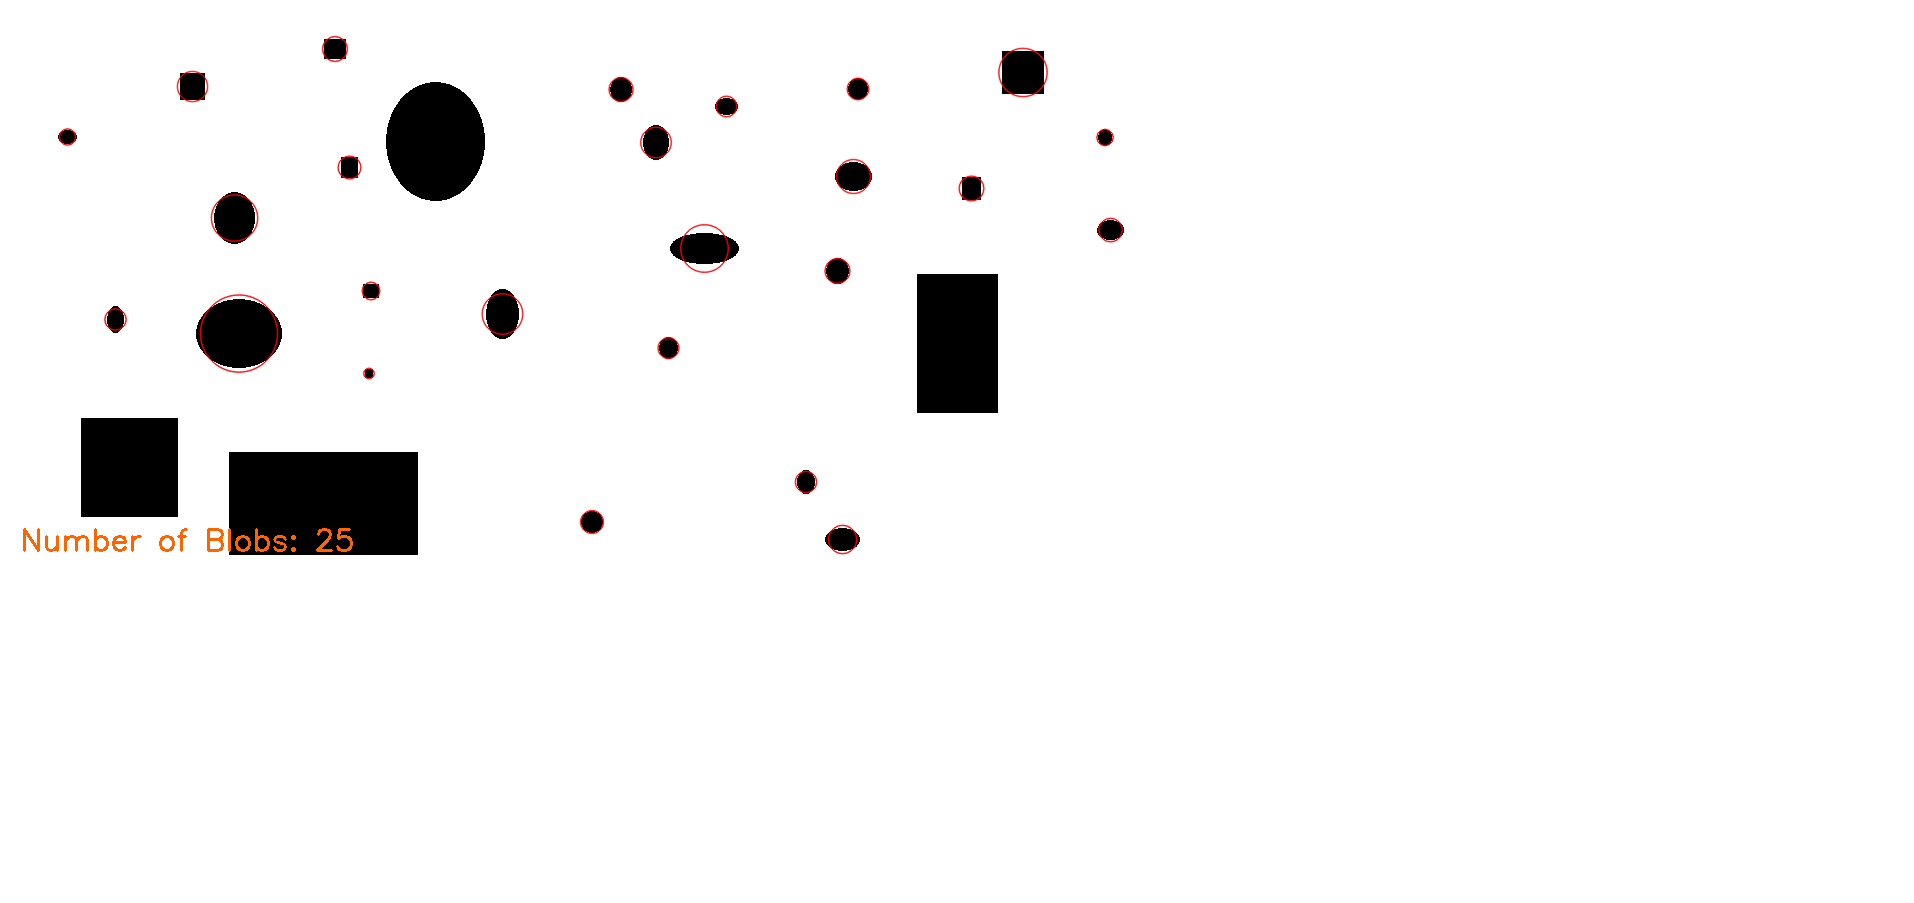

In [ ]:
# Create a detector with the parameters
detector = cv2.SimpleBlobDetector_create(params)

# Detect blobs
keypoints = detector.detect(image)

print(keypoints)

# Draw blobs on our image as red circles
blank = np.zeros((1, 1))
blobs = cv2.drawKeypoints(image, keypoints, blank, (0, 0, 255),
                          cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

number_of_blobs = len(keypoints)
text = "Number of Blobs: " + str(len(keypoints))
cv2.putText(blobs, text, (20, 550),
            cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 100, 255), 2)

# Show blobs
cv2_imshow(blobs)

## Detecting only circluar blobs

(< cv2.KeyPoint 0x7f54645d23c0>, < cv2.KeyPoint 0x7f54645b1a80>)


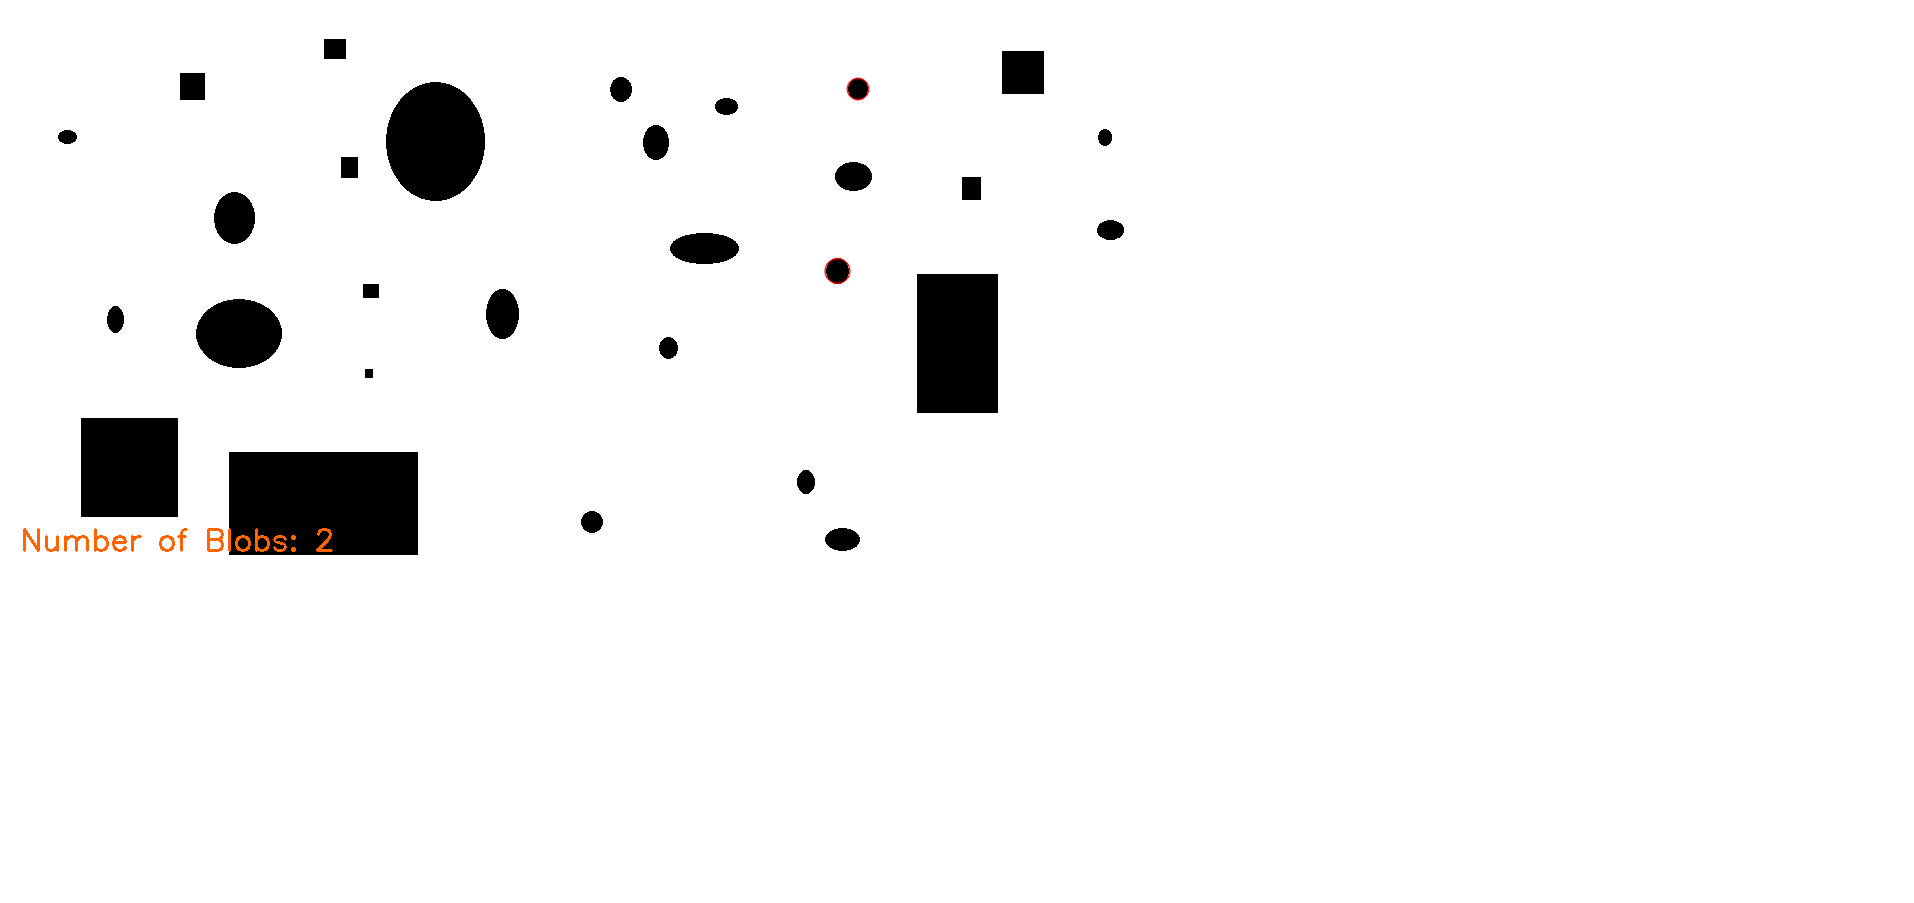

In [ ]:
image = cv2.imread("blob.png", cv2.IMREAD_GRAYSCALE)
# Set up the detector with default parameters.
params = cv2.SimpleBlobDetector_Params()

# Set Circularity filtering parameters
params.filterByCircularity = True
params.minCircularity = 0.9

# Create a detector with the parameters
detector = cv2.SimpleBlobDetector_create(params)

# Detect blobs
keypoints = detector.detect(image)

print(keypoints)

# Draw blobs on our image as red circles
blank = np.zeros((1, 1))
blobs = cv2.drawKeypoints(image, keypoints, blank, (0, 0, 255),
                          cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

number_of_blobs = len(keypoints)
text = "Number of Blobs: " + str(len(keypoints))
cv2.putText(blobs, text, (20, 550),
            cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 100, 255), 2)

# Show blobs
cv2_imshow(blobs)

## Detecting only convex blobs

(< cv2.KeyPoint 0x7f54645b1480>, < cv2.KeyPoint 0x7f54645b1960>, < cv2.KeyPoint 0x7f54645b1540>, < cv2.KeyPoint 0x7f54645b1990>, < cv2.KeyPoint 0x7f54645b1840>, < cv2.KeyPoint 0x7f54645b1cf0>, < cv2.KeyPoint 0x7f54645b1600>)


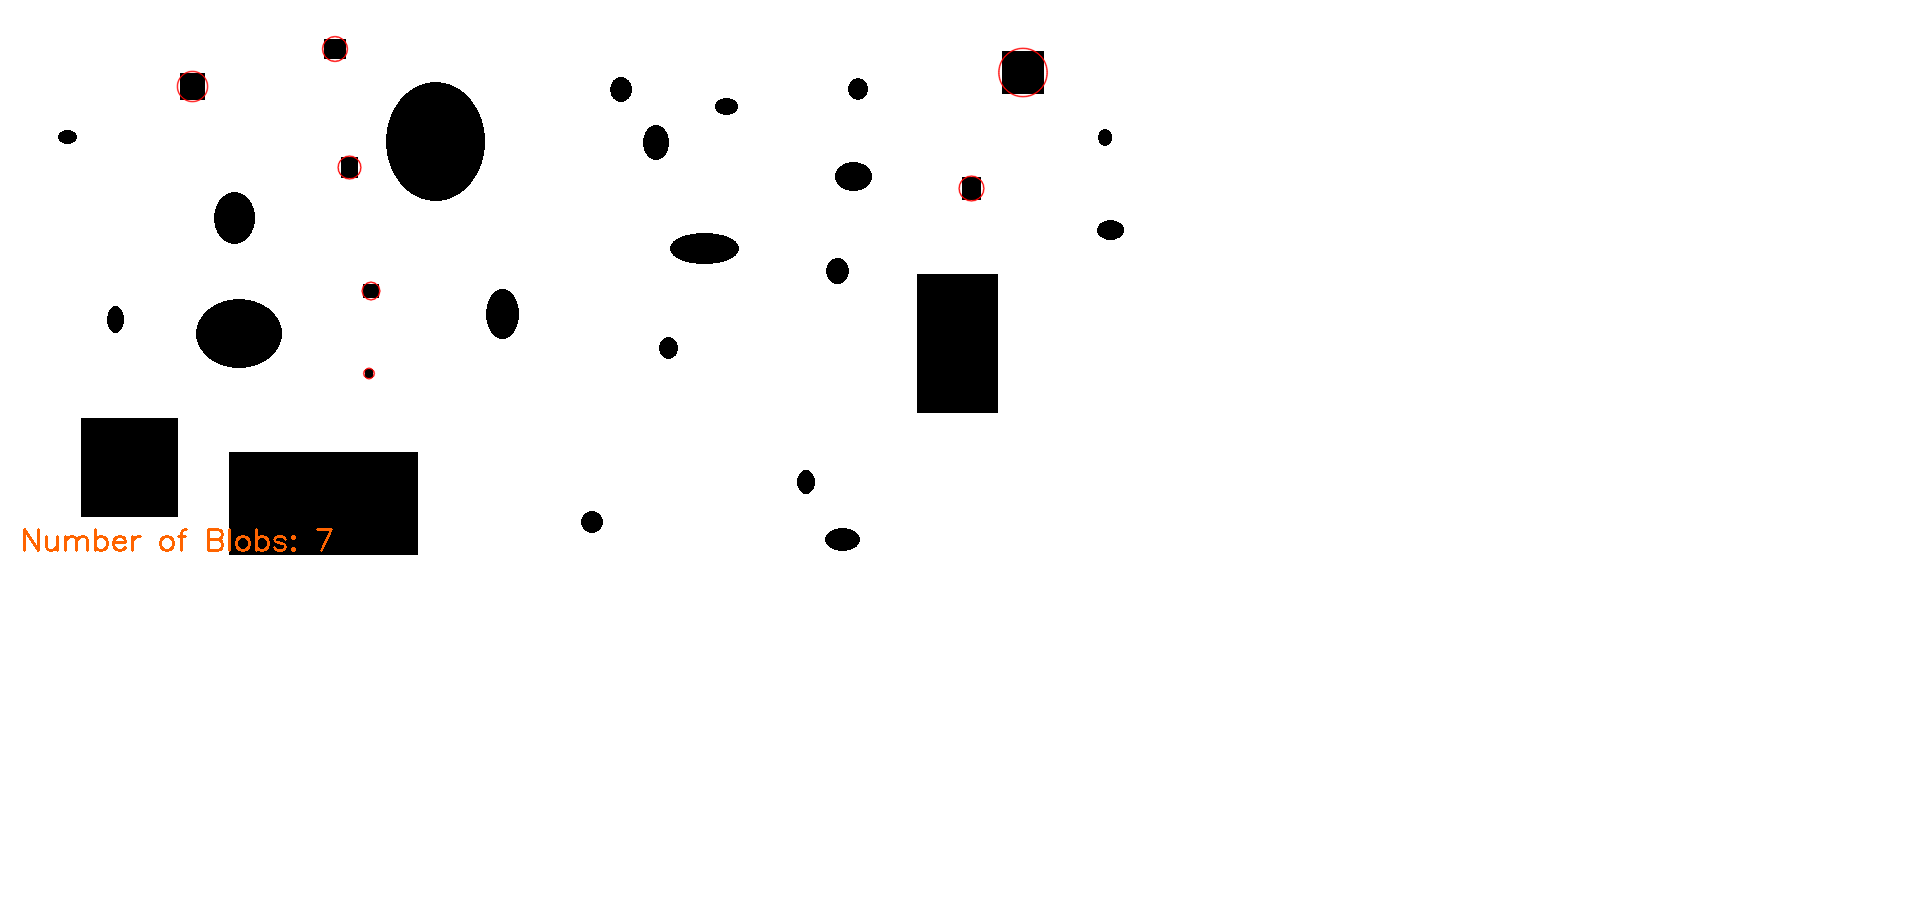

In [ ]:
image = cv2.imread("blob.png", cv2.IMREAD_GRAYSCALE)
# Set up the detector with default parameters.
params = cv2.SimpleBlobDetector_Params()

# Set Convexity filtering parameters
params.filterByConvexity = True
params.minConvexity = 1

# Create a detector with the parameters
detector = cv2.SimpleBlobDetector_create(params)

# Detect blobs
keypoints = detector.detect(image)

print(keypoints)

# Draw blobs on our image as red circles
blank = np.zeros((1, 1))
blobs = cv2.drawKeypoints(image, keypoints, blank, (0, 0, 255),
                          cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

number_of_blobs = len(keypoints)
text = "Number of Blobs: " + str(len(keypoints))
cv2.putText(blobs, text, (20, 550),
            cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 100, 255), 2)

# Show blobs
cv2_imshow(blobs)

## Detecting blobs with min inertia 0.7

(< cv2.KeyPoint 0x7f54645b1690>, < cv2.KeyPoint 0x7f54645b1d50>, < cv2.KeyPoint 0x7f54645b1d80>, < cv2.KeyPoint 0x7f54645b1ed0>, < cv2.KeyPoint 0x7f54645b1c30>, < cv2.KeyPoint 0x7f54645b1450>, < cv2.KeyPoint 0x7f54645b1780>, < cv2.KeyPoint 0x7f54645b16f0>, < cv2.KeyPoint 0x7f54645b1e40>, < cv2.KeyPoint 0x7f54645b1f60>, < cv2.KeyPoint 0x7f54645b1a80>)


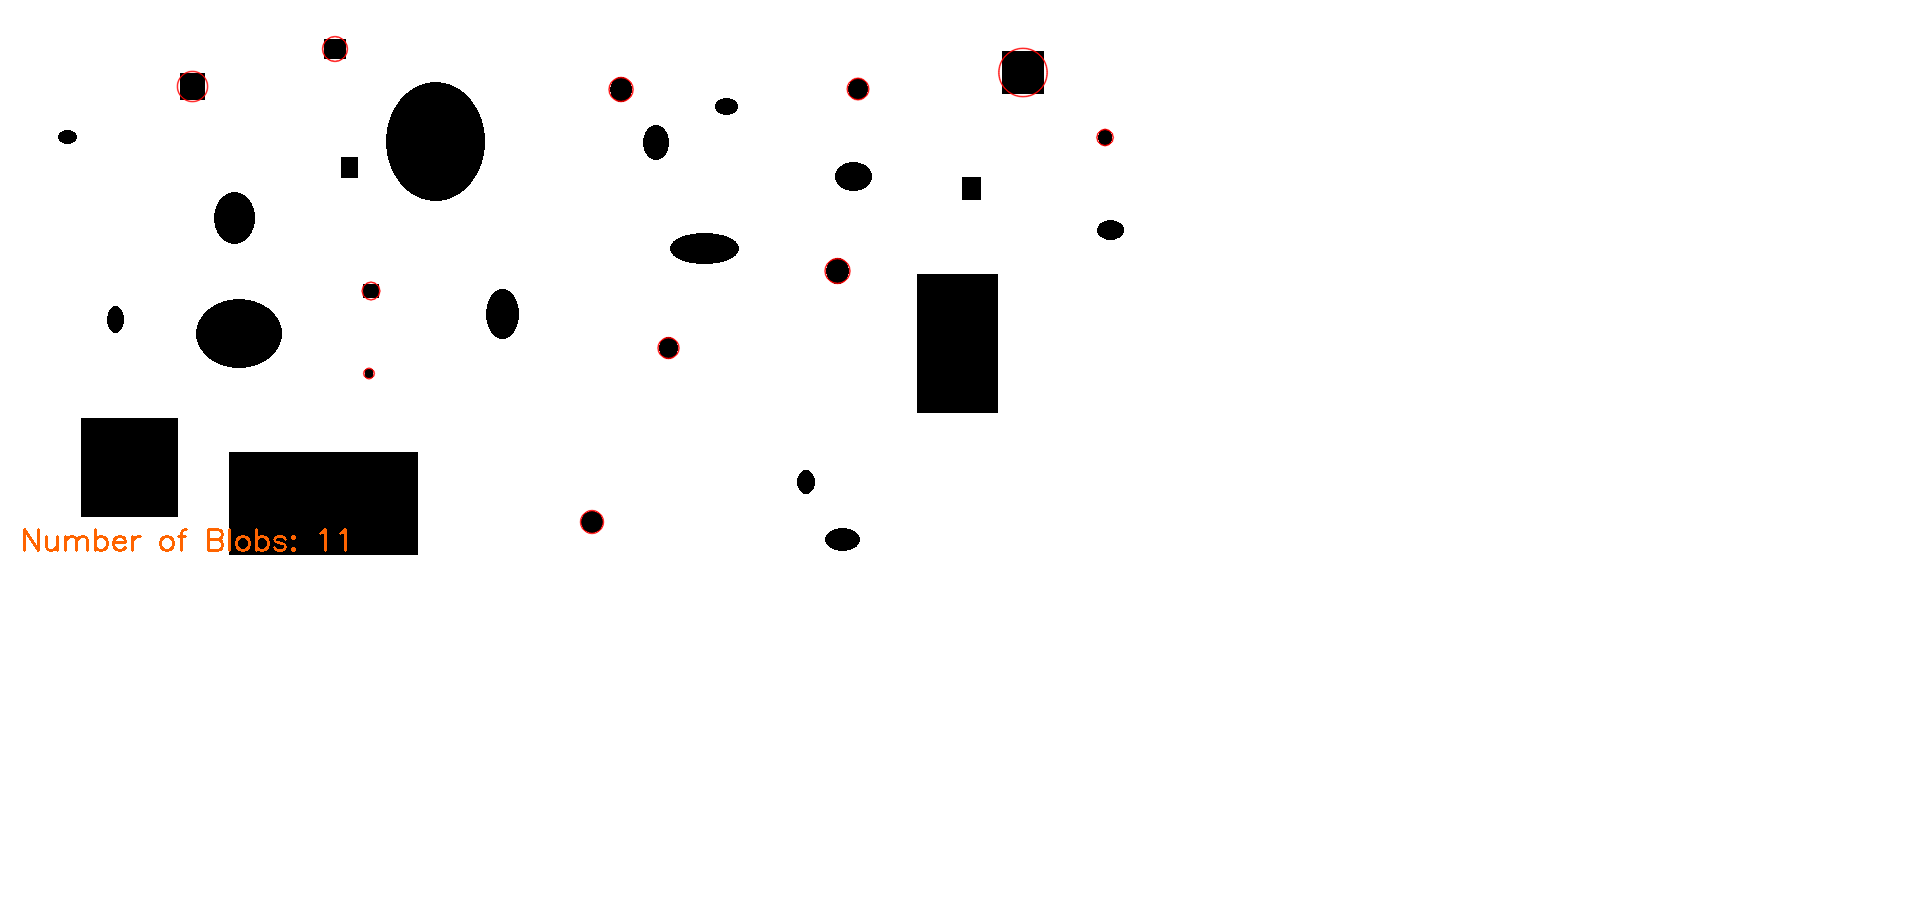

In [ ]:
image = cv2.imread("blob.png", cv2.IMREAD_GRAYSCALE)
# Set up the detector with default parameters.
params = cv2.SimpleBlobDetector_Params()

# Set inertia filtering parameters
params.filterByInertia = True
params.minInertiaRatio = 0.7

# Create a detector with the parameters
detector = cv2.SimpleBlobDetector_create(params)

# Detect blobs
keypoints = detector.detect(image)

print(keypoints)

# Draw blobs on our image as red circles
blank = np.zeros((1, 1))
blobs = cv2.drawKeypoints(image, keypoints, blank, (0, 0, 255),
                          cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

number_of_blobs = len(keypoints)
text = "Number of Blobs: " + str(len(keypoints))
cv2.putText(blobs, text, (20, 550),
            cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 100, 255), 2)

# Show blobs
cv2_imshow(blobs)

## Detecting blobs with min area 400

(< cv2.KeyPoint 0x7f54645b1960>, < cv2.KeyPoint 0x7f54645b1cf0>, < cv2.KeyPoint 0x7f54645b1990>, < cv2.KeyPoint 0x7f54645b17b0>, < cv2.KeyPoint 0x7f54645b1540>, < cv2.KeyPoint 0x7f54645b1600>, < cv2.KeyPoint 0x7f54645b1630>, < cv2.KeyPoint 0x7f54645b1f90>, < cv2.KeyPoint 0x7f54645b1ab0>, < cv2.KeyPoint 0x7f54645b1cc0>, < cv2.KeyPoint 0x7f54645b18d0>, < cv2.KeyPoint 0x7f54645b16c0>, < cv2.KeyPoint 0x7f54645b1750>, < cv2.KeyPoint 0x7f54645b15d0>, < cv2.KeyPoint 0x7f54645b1660>)


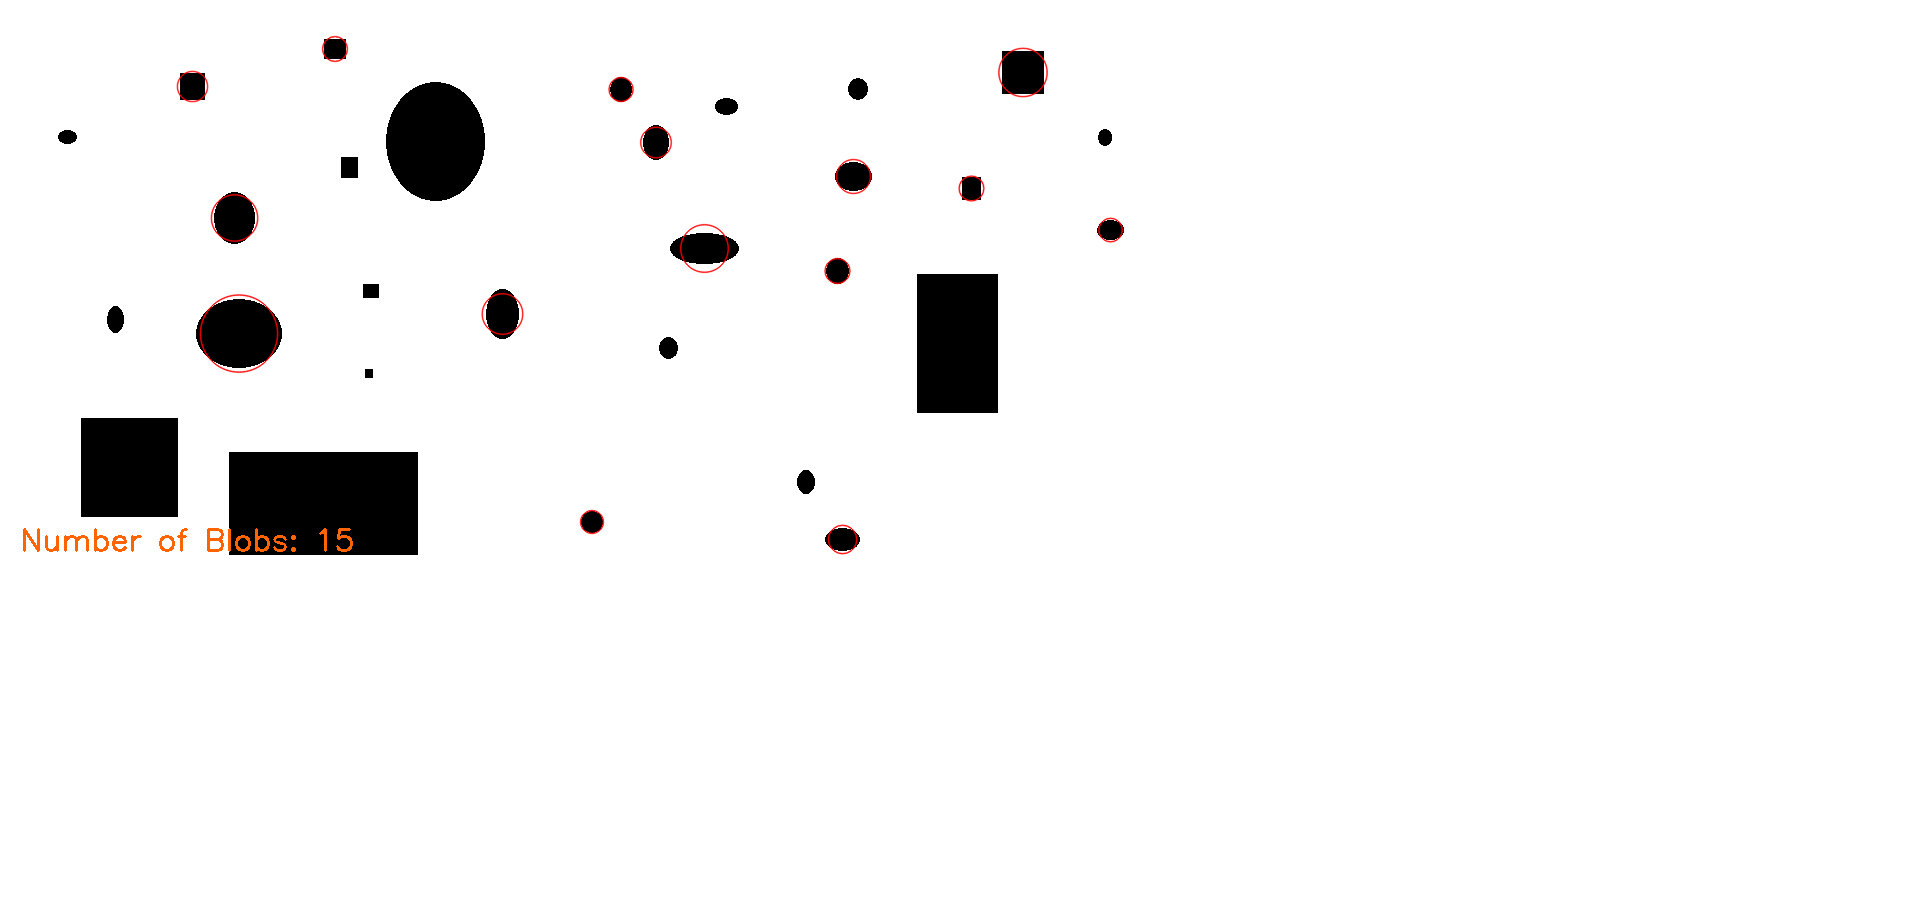

In [ ]:
image = cv2.imread("blob.png", cv2.IMREAD_GRAYSCALE)
# Set up the detector with default parameters.
params = cv2.SimpleBlobDetector_Params()

# Set Area filtering parameters
params.filterByArea = True
params.minArea = 400

# Create a detector with the parameters
detector = cv2.SimpleBlobDetector_create(params)

# Detect blobs
keypoints = detector.detect(image)

print(keypoints)

# Draw blobs on our image as red circles
blank = np.zeros((1, 1))
blobs = cv2.drawKeypoints(image, keypoints, blank, (0, 0, 255),
                          cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

number_of_blobs = len(keypoints)
text = "Number of Blobs: " + str(len(keypoints))
cv2.putText(blobs, text, (20, 550),
            cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 100, 255), 2)

# Show blobs
cv2_imshow(blobs)

## Detect blobs by color (here all blobs are of same color)

(< cv2.KeyPoint 0x7f54645b1690>, < cv2.KeyPoint 0x7f54645b1d50>, < cv2.KeyPoint 0x7f54645b1d80>, < cv2.KeyPoint 0x7f54645b1ed0>, < cv2.KeyPoint 0x7f54645b1c30>, < cv2.KeyPoint 0x7f54645b1450>, < cv2.KeyPoint 0x7f54645b1780>, < cv2.KeyPoint 0x7f54645b16f0>, < cv2.KeyPoint 0x7f54645b1e40>, < cv2.KeyPoint 0x7f54645b1f60>, < cv2.KeyPoint 0x7f54645b1a80>, < cv2.KeyPoint 0x7f54645b1b40>, < cv2.KeyPoint 0x7f54645b1840>, < cv2.KeyPoint 0x7f54645b1510>, < cv2.KeyPoint 0x7f54645b1de0>, < cv2.KeyPoint 0x7f54645b1b10>, < cv2.KeyPoint 0x7f54645b1db0>, < cv2.KeyPoint 0x7f54645b1a20>, < cv2.KeyPoint 0x7f54645b1bd0>, < cv2.KeyPoint 0x7f54645b1570>, < cv2.KeyPoint 0x7f54645b19c0>, < cv2.KeyPoint 0x7f54645b1c90>, < cv2.KeyPoint 0x7f54645b17e0>, < cv2.KeyPoint 0x7f54645b1b70>, < cv2.KeyPoint 0x7f54645b1c60>)


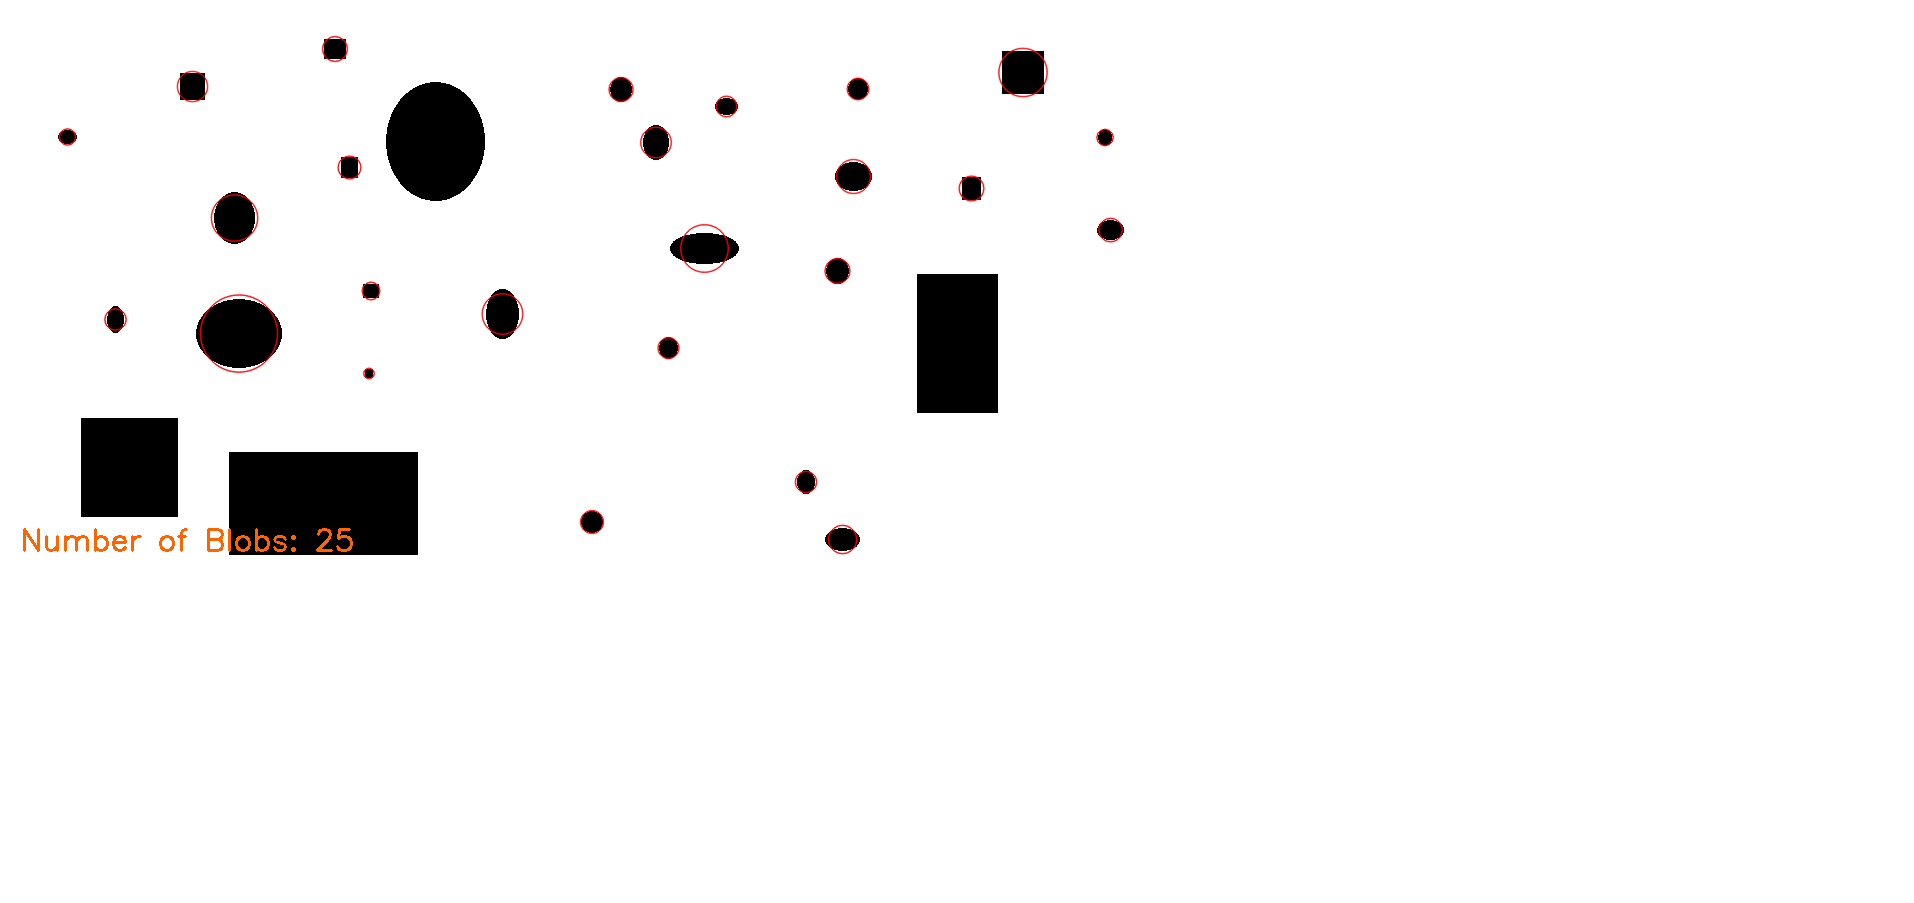

In [ ]:
image = cv2.imread("blob.png", cv2.IMREAD_GRAYSCALE)
# Set up the detector with default parameters.
params = cv2.SimpleBlobDetector_Params()

# Set Area filtering parameters
params.filterByColor = True

# Create a detector with the parameters
detector = cv2.SimpleBlobDetector_create(params)

# Detect blobs
keypoints = detector.detect(image)

print(keypoints)

# Draw blobs on our image as red circles
blank = np.zeros((1, 1))
blobs = cv2.drawKeypoints(image, keypoints, blank, (0, 0, 255),
                          cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

number_of_blobs = len(keypoints)
text = "Number of Blobs: " + str(len(keypoints))
cv2.putText(blobs, text, (20, 550),
            cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 100, 255), 2)

# Show blobs
cv2_imshow(blobs)